In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\SNEHA\Desktop\Machine learning\PCA\houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data preprocessing

### Data type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Shape of data

In [4]:
data.shape

(1459, 81)

### Univariate analysis

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1201.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.995202,56.895134,70.049958,10516.920493,6.098698,5.575051,1971.266621,1984.873886,103.591316,443.355038,...,94.148047,46.552433,21.812886,3.411926,15.071282,2.760795,43.278958,6.318711,2007.814942,180908.119260
std,421.329613,42.314997,24.284752,9984.686651,1.383270,1.113125,30.213226,20.650146,181.093229,456.124694,...,125.327533,66.150443,60.901345,29.327247,55.775138,40.191018,496.228167,2.701775,1.328188,79468.170006
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,731.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,165.500000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values

In [6]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      258
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Eliminating all object data

In [7]:
data = data.select_dtypes(exclude=['object'])
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1451 non-null   float64
 9   BsmtFinSF1     1459 non-null   int64  
 10  BsmtFinSF2     1459 non-null   int64  
 11  BsmtUnfSF      1459 non-null   int64  
 12  TotalBsmtSF    1459 non-null   int64  
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   int64  
 18  BsmtHalf

In [9]:
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      258
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Identifying outliers in data

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_4892\3178338329.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


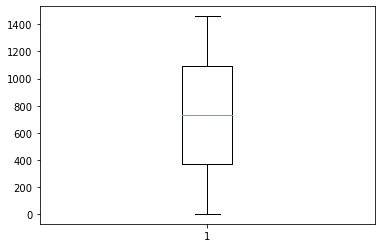

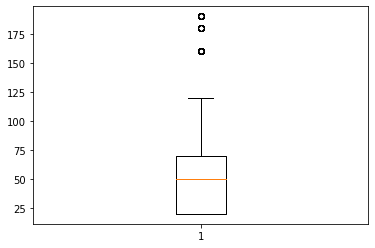

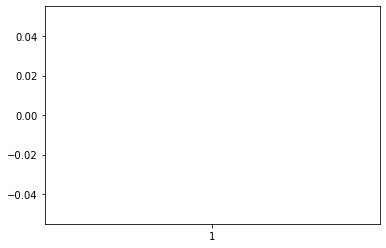

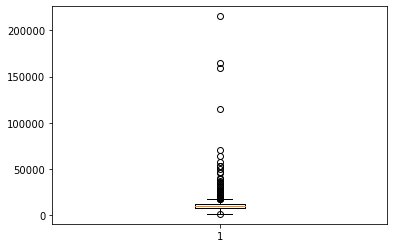

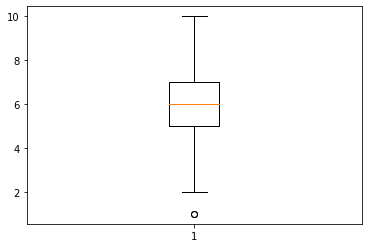

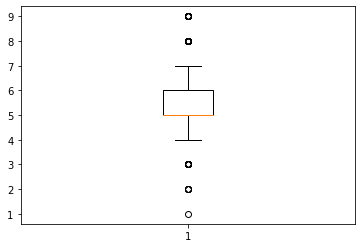

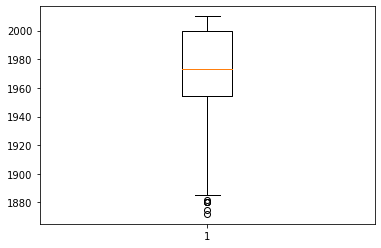

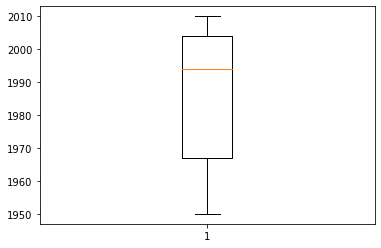

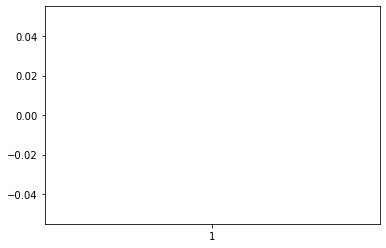

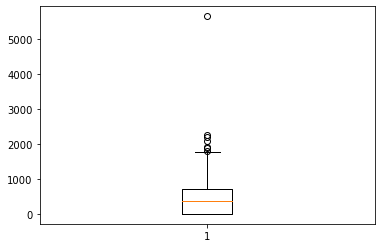

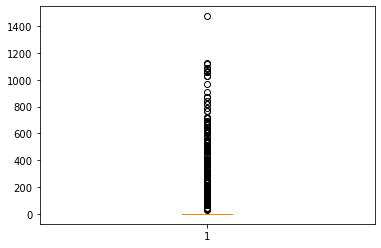

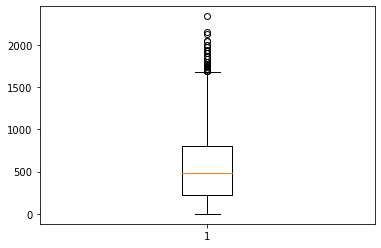

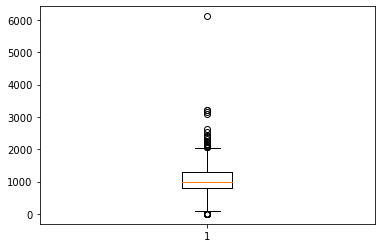

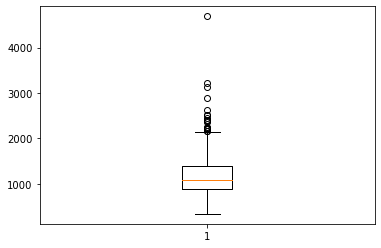

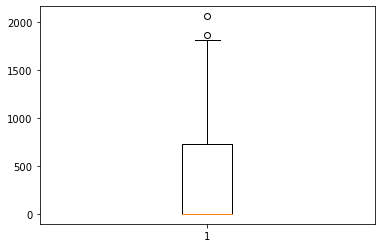

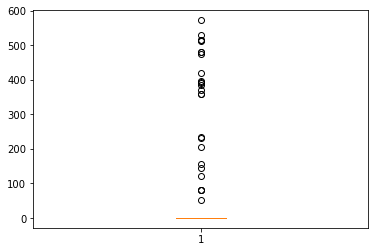

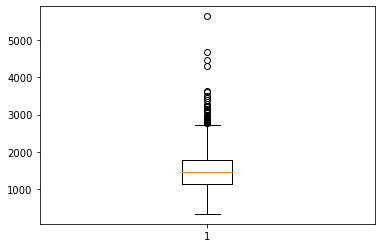

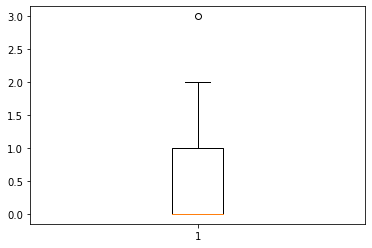

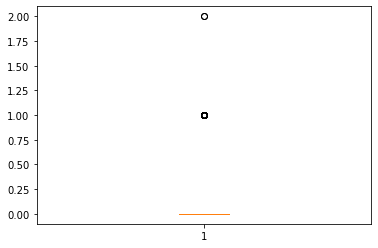

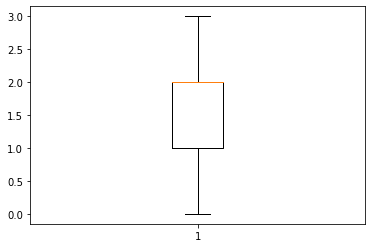

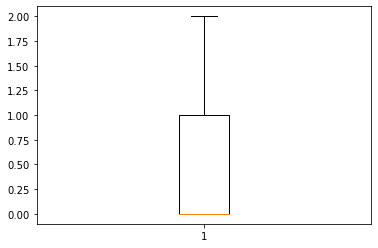

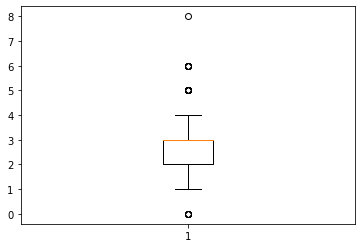

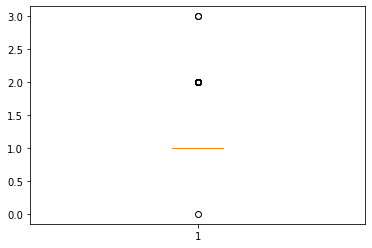

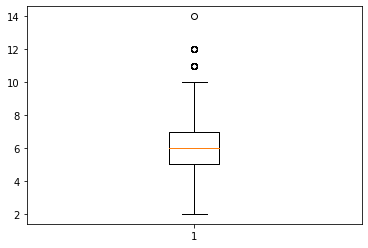

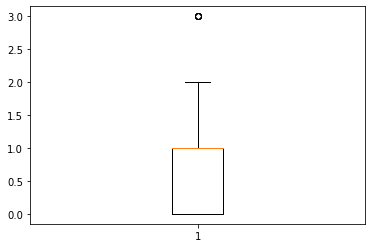

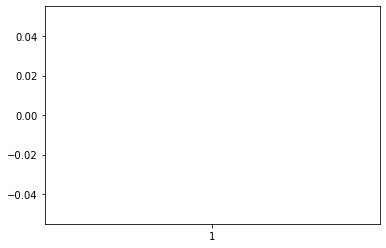

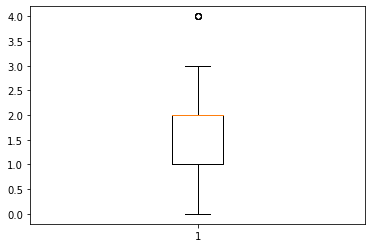

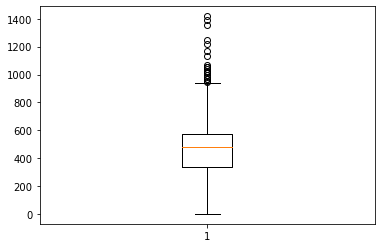

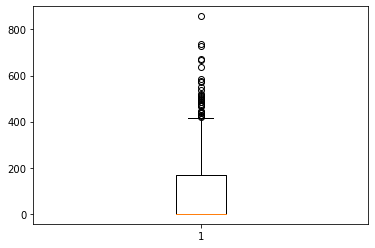

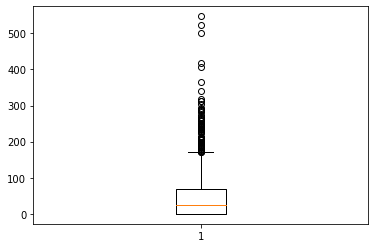

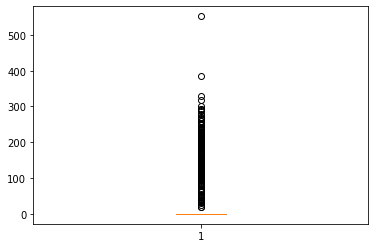

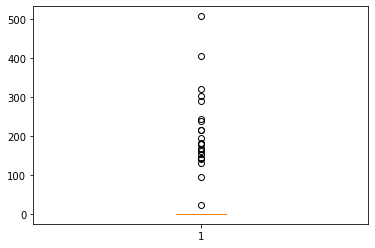

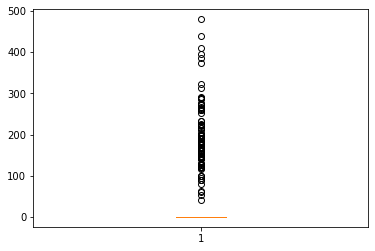

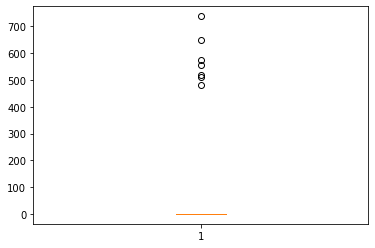

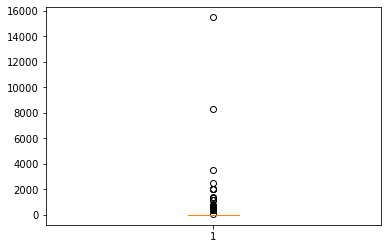

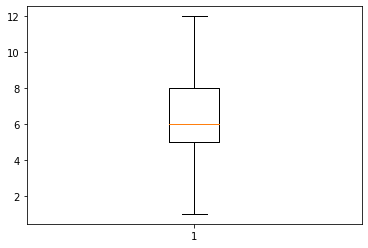

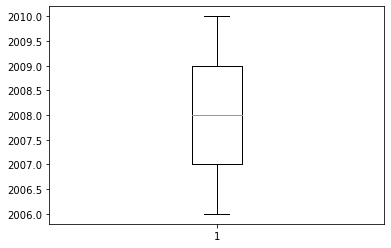

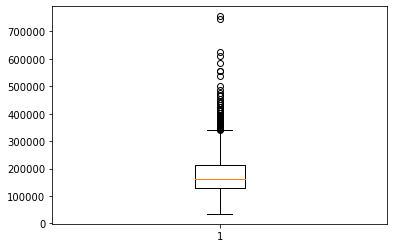

In [11]:
import matplotlib.pyplot as plt
i =data.columns

for x in i:
    plt.figure()
    plt.boxplot(data[x])

In [12]:
def outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper_limit =q3+ 1.5*iqr
    lower_limit =q1- 1.5*iqr
    
    data[col]=np.where(data[col]>upper_limit,upper_limit,
                     np.where(data[col]<lower_limit,lower_limit,data[col]))
    return data[col]

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          7.5   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  1456.0        60.0         62.0   7917.0          6.0          5.0   
1455  1457.0        20.0         85.0  13175.0          6.0          6.0   
1456  1458.0        70.0         66.0   9042.0          7.0          7.5   
1457  1459.0        20.0         68.0   9717.0          5.0          6.0   
1458  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0        2003

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_4892\1225084138.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


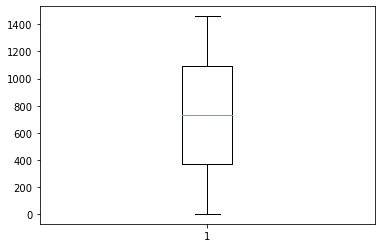

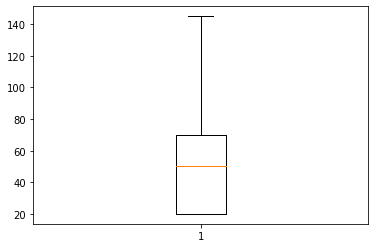

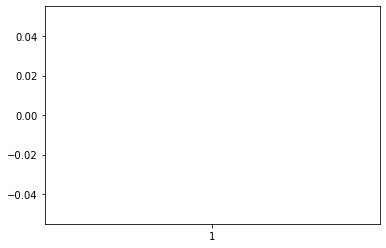

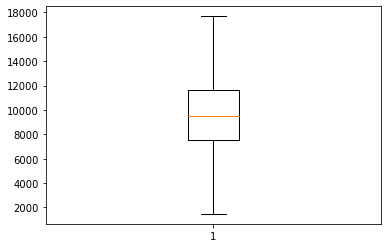

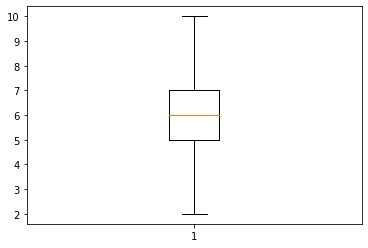

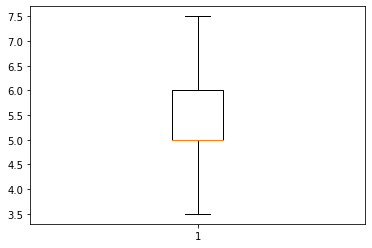

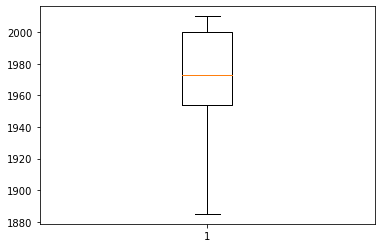

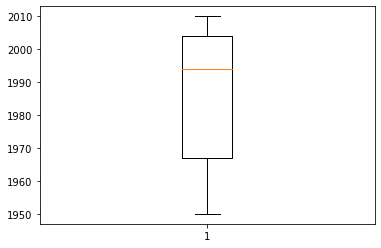

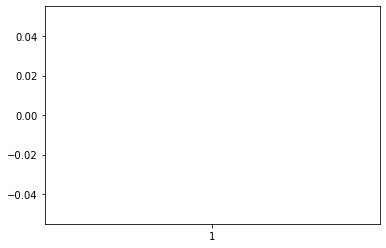

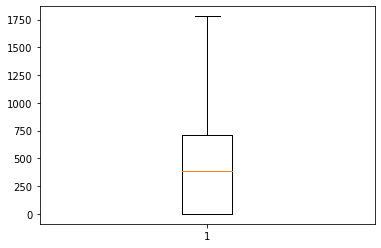

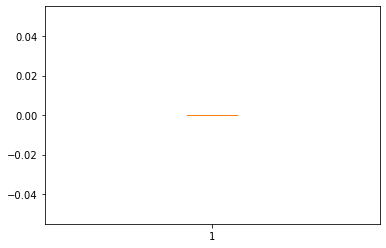

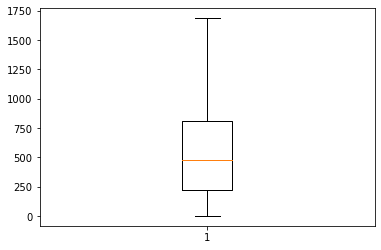

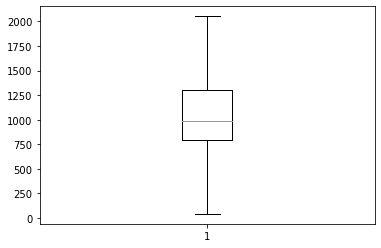

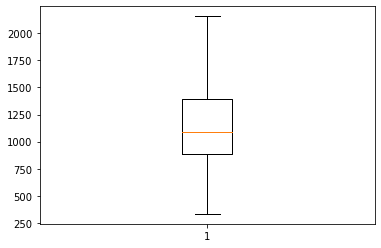

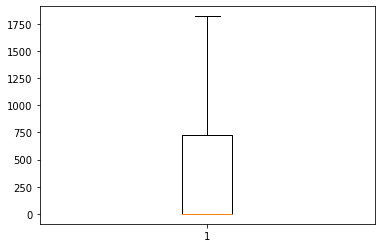

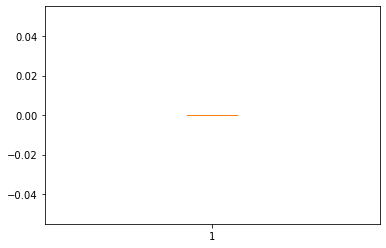

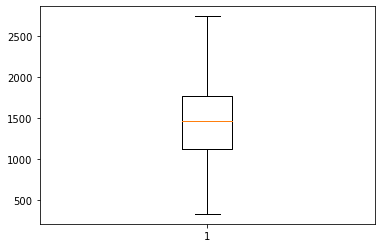

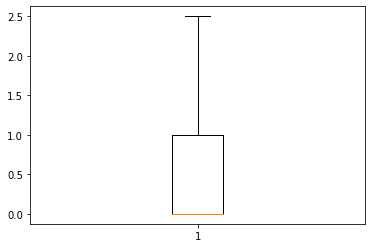

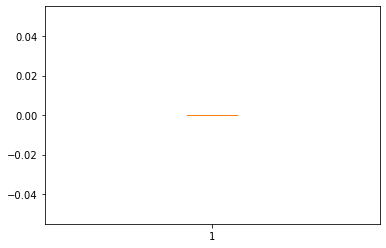

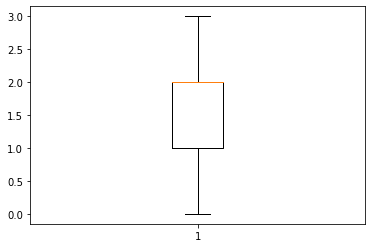

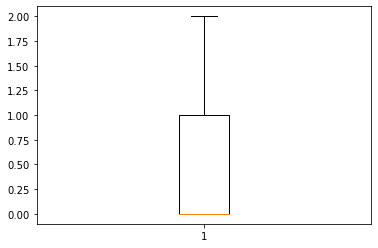

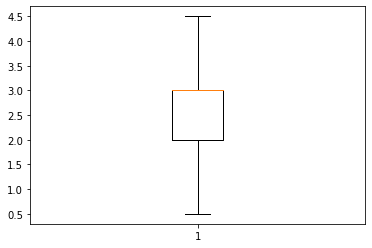

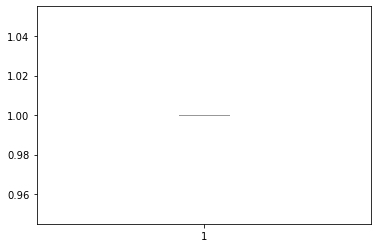

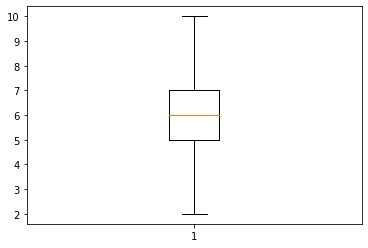

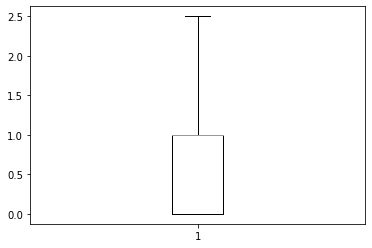

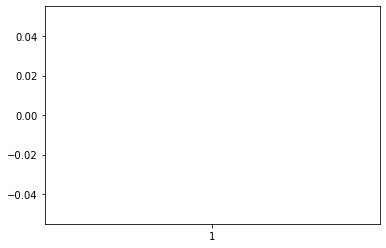

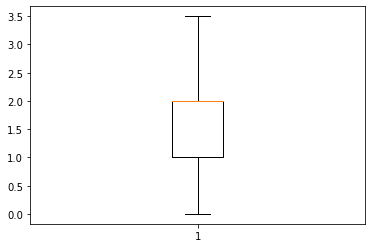

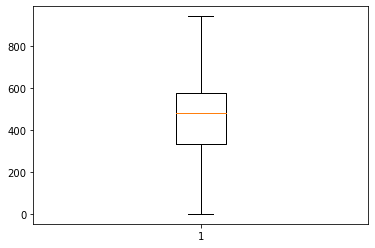

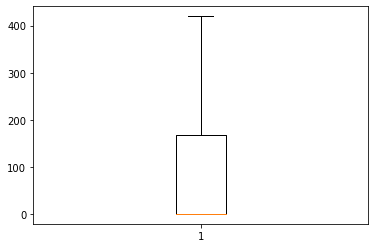

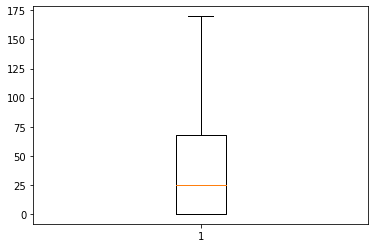

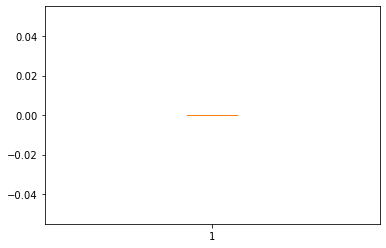

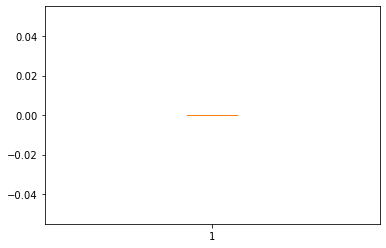

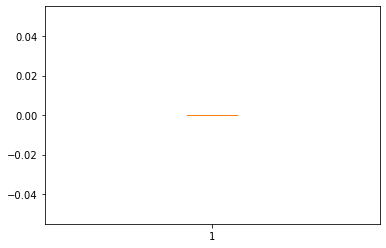

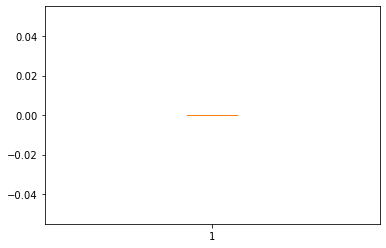

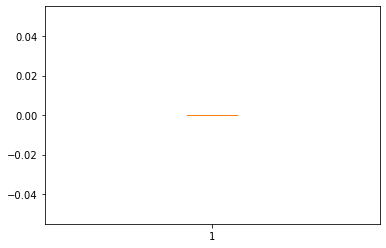

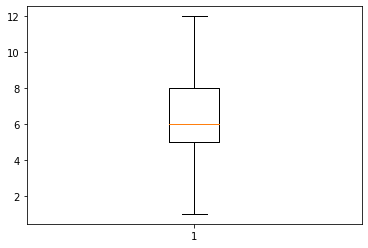

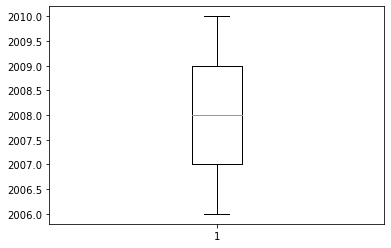

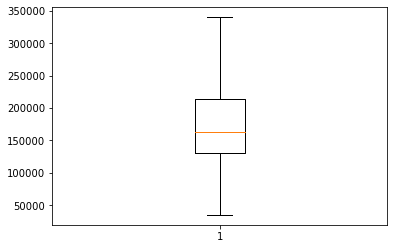

In [13]:
j= data.columns
for i in j:
    print(outliers(data,j))
    
for x in j:
    plt.figure()
    plt.boxplot(data[x])

### Replacing missing values 

In [14]:
data["LotFrontage"].fillna(data["LotFrontage"].mean(),inplace=True)

In [15]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(),inplace=True)

In [16]:
data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [29]:
i=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']
X_train = data[i]
y_train = data['SalePrice']

In [30]:
X_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.404748,-0.403323,0.062753,-0.085433,0.055785,0.058637,0.033945,-0.076533,NaN,...,-0.085809,-0.009995,0.001668,NaN,NaN,NaN,NaN,NaN,-0.004115,-0.021302
LotFrontage,-0.404748,1.000000,0.585304,0.242049,-0.062867,0.135437,0.077211,0.203992,0.144736,NaN,...,0.343083,0.101544,0.147869,NaN,NaN,NaN,NaN,NaN,0.016218,0.005876
LotArea,-0.403323,0.585304,1.000000,0.221494,-0.026564,0.065710,0.054530,0.145491,0.215757,NaN,...,0.344665,0.198253,0.162013,NaN,NaN,NaN,NaN,NaN,0.003613,-0.036981
OverallQual,0.062753,0.242049,0.221494,1.000000,-0.134338,0.575219,0.551229,0.419270,0.229392,NaN,...,0.568202,0.246037,0.358116,NaN,NaN,NaN,NaN,NaN,0.068766,-0.027710
OverallCond,-0.085433,-0.062867,-0.026564,-0.134338,1.000000,-0.399734,0.038623,-0.154102,-0.045742,NaN,...,-0.177967,-0.011689,-0.083379,NaN,NaN,NaN,NaN,NaN,-0.010555,0.045888
YearBuilt,0.055785,0.135437,0.065710,0.575219,-0.399734,1.000000,0.594999,0.350742,0.252858,NaN,...,0.487376,0.238453,0.262567,NaN,NaN,NaN,NaN,NaN,0.012831,-0.013331
YearRemodAdd,0.058637,0.077211,0.054530,0.551229,0.038623,0.594999,1.000000,0.189292,0.126773,NaN,...,0.377360,0.223327,0.282475,NaN,NaN,NaN,NaN,NaN,0.022197,0.036109
MasVnrArea,0.033945,0.203992,0.145491,0.419270,-0.154102,0.350742,0.189292,1.000000,0.250823,NaN,...,0.386980,0.160855,0.175671,NaN,NaN,NaN,NaN,NaN,0.007894,0.002166
BsmtFinSF1,-0.076533,0.144736,0.215757,0.229392,-0.045742,0.252858,0.126773,0.250823,1.000000,NaN,...,0.278385,0.208518,0.087420,NaN,NaN,NaN,NaN,NaN,-0.005924,0.013385
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PCA is affected by scale so we need to scale the features in the data before applying PCA

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train)

In [19]:
X_train_1

array([[-1.73319292,  0.13111221, -0.23188494, ..., -1.59902002,
         0.13937913,  0.46397604],
       [-1.73081866, -0.93532802,  0.60931667, ..., -0.48825814,
        -0.61378438,  0.06223224],
       [-1.72844441,  0.13111221, -0.06364462, ...,  0.99275771,
         0.13937913,  0.68716705],
       ...,
       [ 1.72609294,  0.39772227, -0.17580483, ..., -0.48825814,
         1.64570615,  1.32698125],
       [ 1.72846719, -0.93532802, -0.06364462, ..., -0.8585121 ,
         1.64570615, -0.52364414],
       [ 1.73084145, -0.93532802,  0.32891613, ..., -0.11800418,
         0.13937913, -0.44366737]])

### Mean

In [20]:
X_train_1.mean(axis=0)

array([ 7.79210677e-17,  8.52261678e-17,  2.89768970e-16, -1.07141468e-16,
        2.38633270e-16, -3.70125071e-16,  1.15420581e-15,  3.05840191e-15,
                   nan,  6.81809342e-17,  0.00000000e+00,  4.13955672e-17,
       -2.09412869e-16, -2.23414311e-16, -1.05923951e-16,  0.00000000e+00,
       -2.43503336e-18, -1.41231935e-16,  0.00000000e+00,  1.65582269e-16,
        7.76166885e-17, -2.48373403e-16,  0.00000000e+00, -1.58277169e-16,
       -9.74013346e-17,  2.30110653e-15, -9.74013346e-17, -8.03561010e-17,
       -8.76612011e-17,  4.59612548e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.62656339e-17,
        6.04497033e-14, -1.89932602e-16])

### Standard deviation 

In [21]:
X_train_1.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.])

In [22]:
X_train_1

array([[-1.73319292,  0.13111221, -0.23188494, ..., -1.59902002,
         0.13937913,  0.46397604],
       [-1.73081866, -0.93532802,  0.60931667, ..., -0.48825814,
        -0.61378438,  0.06223224],
       [-1.72844441,  0.13111221, -0.06364462, ...,  0.99275771,
         0.13937913,  0.68716705],
       ...,
       [ 1.72609294,  0.39772227, -0.17580483, ..., -0.48825814,
         1.64570615,  1.32698125],
       [ 1.72846719, -0.93532802, -0.06364462, ..., -0.8585121 ,
         1.64570615, -0.52364414],
       [ 1.73084145, -0.93532802,  0.32891613, ..., -0.11800418,
         0.13937913, -0.44366737]])

### Number of variables in original dataset

In [23]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 3) # we are specifying we want 3 PCA
  
principalComponents= pca.fit(X_train_1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
principalComponents.explained_variance_ 